## Objective Description

Create different 'dirty' and 'clean' datasets for further analysis.

### - **Simulate Data Imperfections**
Two common types of data degradation were introduced to simulate real-world scenarios:
- **Value Removal**: Randomly removed 10% and 50% of values in the dataset to simulate missing data.
- **Value Alteration**: Randomly modified 10% and 50% of feature values to simulate noise or corruption.

### - **Apply Data Cleaning Techniques**
For datasets with missing values, three common strategies were used to handle them:
- **Mean Imputation**
- **K-Nearest Neighbors (KNN) Imputation**
- **Dropping Rows with Missing Values**

**In the end we ended up with 11 datasets**:
- 1x Original Dataset
- 2x Dataset with removed values:
    - 1x with strength of 10%
    - 1x with strength of 50%
- 2x Datasets with changed values:
    - 1x with strength of 10%
    - 1x with strength of 50%
- 6x cleaned versions of the removed values dataset:
    - 2x Simple imputer cleaned
    - 2x KNN imputer cleaned
    - 2x Missing rows cleaned

![Datasets Overview](../report/dataset_overview.png)

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel('../data/MTBLS92_raw.xlsx', index_col='Idx')
df.head(10)

,SampleID,Class,Menopause,ER,Grade,Her2,N-stage,T-stage,Timepoint,Series,...,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138
Idx,,,,,,,,,,,,,,,,,,,,,
1,A_1,0.0,2,1,2.0,0,0,3,BL,discovery,...,9.963454,3.976321,6.033208,20.737836,39.518648,4.372182,15.099900,15.520762,29.760339,2.890181
2,A_2,0.0,2,0,2.0,0,1,2,BL,discovery,...,12.106535,5.006672,7.112918,17.030243,14.513175,2.961922,16.137018,13.461109,11.717635,1.213627
3,A_3,0.0,2,1,2.0,0,2,5,BL,discovery,...,12.406024,5.279220,3.238246,23.586563,13.248736,4.775705,16.418746,18.986196,25.661178,1.724701
4,A_4,0.0,2,1,1.0,0,1,2,BL,discovery,...,6.644769,4.359540,2.003790,14.733730,6.092037,2.101370,10.146233,8.364284,13.960879,0.816202
5,A_5,0.0,2,1,2.0,0,1,2,BL,discovery,...,6.066591,4.565057,3.456530,15.371234,6.091531,1.318297,7.047676,6.197168,6.994256,0.754510
6,A_6,0.0,1,1,2.0,0,1,2,BL,discovery,...,10.442485,5.173761,2.649353,17.887483,7.848590,1.785468,15.681046,12.719544,15.228005,1.593819
7,A_7,0.0,2,1,2.0,0,0,2,BL,discovery,...,8.196255,10.647111,4.055241,21.942372,10.797598,4.237617,14.503946,14.726594,26.439269,1.898444
8,A_8,0.0,2,1,2.0,0,1,5,BL,discovery,...,13.943848,4.961841,5.163851,26.530701,12.926935,1.345866,13.505289,11.108142,5.084578,1.836360
9,A_10,0.0,1,1,3.0,0,1,2,BL,discovery,...,5.389345,5.237880,2.010686,7.305390,3.134031,1.091911,7.427189,5.925728,8.543335,0.763399


## Original Dataset

For the original dataset we'll follow the same preprocessing steps as last week for consistency:
- Dropping rows without a class label (because we can't do any ML on unlabelled data)
- Dropping the **Idx**, **SampleID**, **Timepoint**, **Chemotherapy** response, and **Series** columns

All further datasets will be forked off of this dataset.

In [36]:
df_og = df.dropna(subset=['Class']).drop(['Idx','SampleID','Timepoint','Chemotherapy response','Series'], axis=1) 
df_og.head(10)
df_og.to_csv('../data/MTBLS92_original.csv', index=False)

## 2x Changed Value Datasets

- For these 2 datasets we use the `randomize_values` function to randomly change 10%, and 50% of the numeric values (excluding the 'Class' column) in the original dataset.
- The randomization is performed by selecting random positions in the numeric columns and replacing their values with new random values drawn from the same column's range.
- This simulates different levels of noise or corruption in the data.
- The resulting datasets are saved as `df_changed_10`, and `df_changed_50`.

In [ ]:
def randomize_values(df, percent, random_state=None):
    df_rand = df.copy()
    rng = np.random.default_rng(random_state)

    # Exclude 'Class' from numeric columns to randomize
    num_cols = [col for col in df_rand.select_dtypes(include=[np.number]).columns if col != 'Class']
    total_values = df_rand[num_cols].size
    n_change = int(total_values * percent / 100)

    # Get random indices to change
    rows = rng.integers(0, df_rand.shape[0], n_change)
    cols = rng.integers(0, len(num_cols), n_change)

    for r, c in zip(rows, cols):
        col = num_cols[c]
        col_min, col_max = df_rand[col].min(), df_rand[col].max()
        if np.issubdtype(df_rand[col].dtype, np.integer):
            new_val = rng.integers(col_min, col_max + 1)
        else:
            new_val = rng.uniform(col_min, col_max)
        df_rand.at[r, col] = new_val
    return df_rand

df_changed_10 = randomize_values(df_og, 10, random_state=42)
df_changed_50 = randomize_values(df_og, 50, random_state=42)

df_changed_10.to_csv('../data/changed_values/MTBLS92_changed_10.csv', index=False)
df_changed_50.to_csv('../data/changed_values/MTBLS92_changed_50.csv', index=False)

## 2x Removed Value Datasets

- For these datasets, we use the `randomly_set_nulls` function to randomly set 10% and 50% of the values (excluding the 'Class' column) in the original dataset to NaN.
- The function ensures the missing values are distributed randomly across all eligible columns and rows. 
- This simulates missing data at different strengths. 
- The resulting datasets are saved as `df_removed_10` and `df_removed_50`.

In [ ]:
def randomly_set_nulls(df, percent, random_state=None):
    df_null = df.copy()
    rng = np.random.default_rng(random_state)
    # Exclude 'Class' column
    cols = [col for col in df_null.columns if col != 'Class']
    total_values = df_null[cols].size
    n_null = int(total_values * percent / 100)
    # Get random indices
    rows = rng.integers(0, df_null.shape[0], n_null)
    cols_idx = rng.integers(0, len(cols), n_null)
    for r, c in zip(rows, cols_idx):
        df_null.iat[r, df_null.columns.get_loc(cols[c])] = np.nan
    return df_null

df_removed_10 = randomly_set_nulls(df_og, 10, random_state=42)
df_removed_50 = randomly_set_nulls(df_og, 50, random_state=42)

df_removed_10.to_csv('../data/removed_values/MTBLS92_removed_10.csv', index=False)
df_removed_50.to_csv('../data/removed_values/MTBLS92_removed_50.csv', index=False)

## 6x Cleaned Versions of the Removed Value Datasets

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer

# Simple Imputer (mean)
simple_imputer = SimpleImputer(strategy='mean')
df_removed_10_simple = pd.DataFrame(simple_imputer.fit_transform(df_removed_10), columns=df_removed_10.columns)
df_removed_50_simple = pd.DataFrame(simple_imputer.fit_transform(df_removed_50), columns=df_removed_50.columns)
df_removed_10_simple.to_csv('../data/remove_cleaned/MTBLS92_cleaned_10_simple.csv', index=False)
df_removed_50_simple.to_csv('../data/remove_cleaned/MTBLS92_cleaned_50_simple.csv', index=False)


# KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df_removed_10_knn = pd.DataFrame(knn_imputer.fit_transform(df_removed_10), columns=df_removed_10.columns)
df_removed_50_knn = pd.DataFrame(knn_imputer.fit_transform(df_removed_50), columns=df_removed_50.columns)
df_removed_10_knn.to_csv('../data/remove_cleaned/MTBLS92_cleaned_10_knn.csv', index=False)
df_removed_50_knn.to_csv('../data/remove_cleaned/MTBLS92_cleaned_50_knn.csv', index=False)

# Remove rows with null values
df_removed_10_dropna = df_removed_10.dropna()
df_removed_50_dropna = df_removed_50.dropna()
df_removed_10_dropna.to_csv('../data/remove_cleaned/MTBLS92_cleaned_10_dropna.csv', index=False)
df_removed_50_dropna.to_csv('../data/remove_cleaned/MTBLS92_cleaned_50_dropna.csv', index=False)

In [10]:
datasets = {
    "original": "../data/MTBLS92_original.csv",
    "dirty_A_10": "../data/changed_values/MTBLS92_changed_10.csv",
    "dirty_A_50": "../data/changed_values/MTBLS92_changed_50.csv",
    "dirty_B_10": "../data/removed_values/MTBLS92_removed_10.csv",
    "dirty_B_50": "../data/removed_values/MTBLS92_removed_50.csv",
    "cleaned_10_simple": "../data/remove_cleaned/MTBLS92_cleaned_10_simple.csv",
    "cleaned_10_knn": "../data/remove_cleaned/MTBLS92_cleaned_10_knn.csv",
    "cleaned_50_simple": "../data/remove_cleaned/MTBLS92_cleaned_50_simple.csv",
    "cleaned_50_knn": "../data/remove_cleaned/MTBLS92_cleaned_50_knn.csv"
}

In [2]:
%pip install umap-learn



   ---------------------------------------- 0/2 [pynndescent]
   -------------------- ------------------- 1/2 [umap-learn]
   -------------------- ------------------- 1/2 [umap-learn]
   ---------------------------------------- 2/2 [umap-learn]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


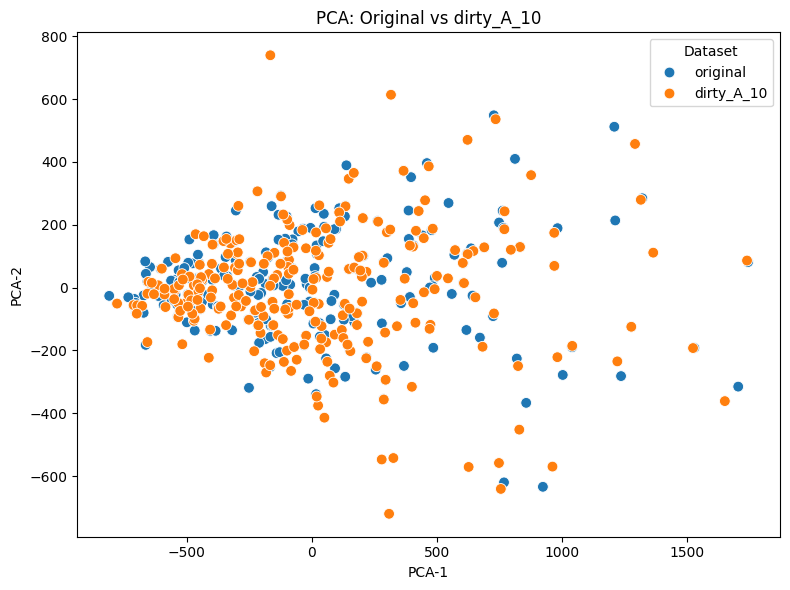

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


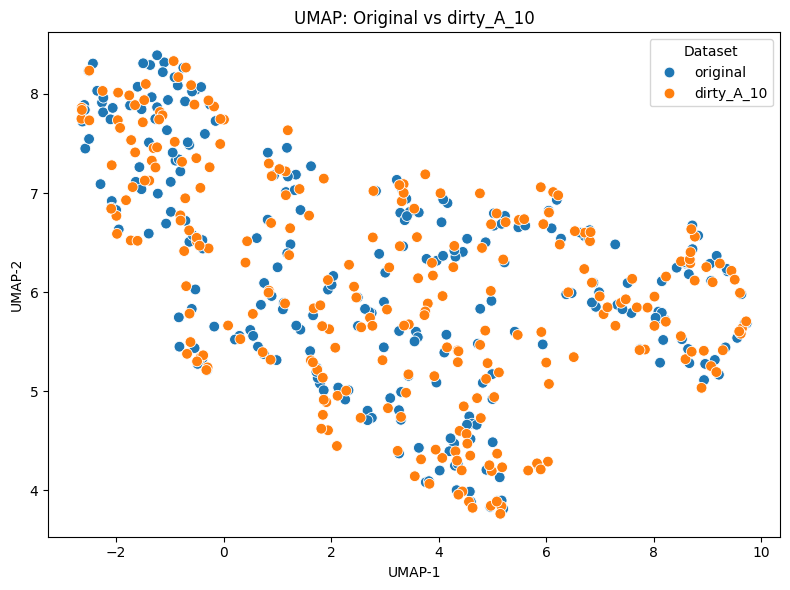

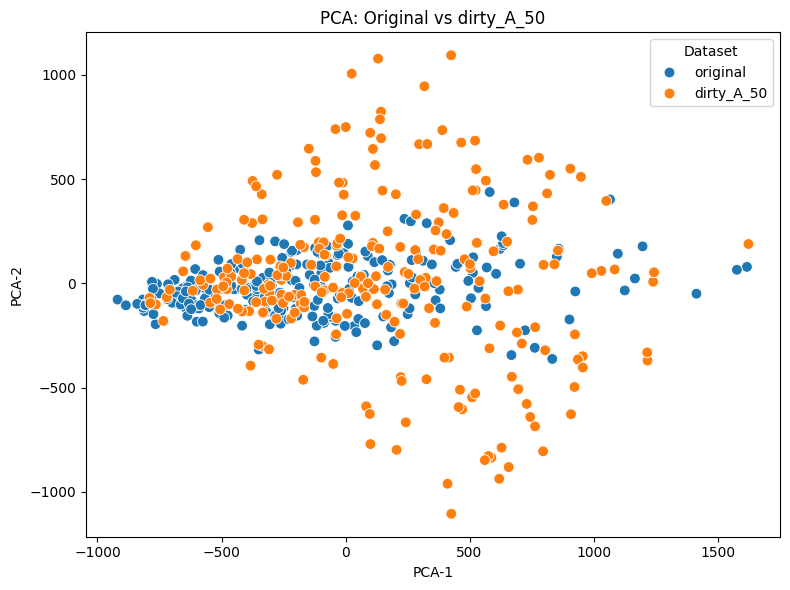

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


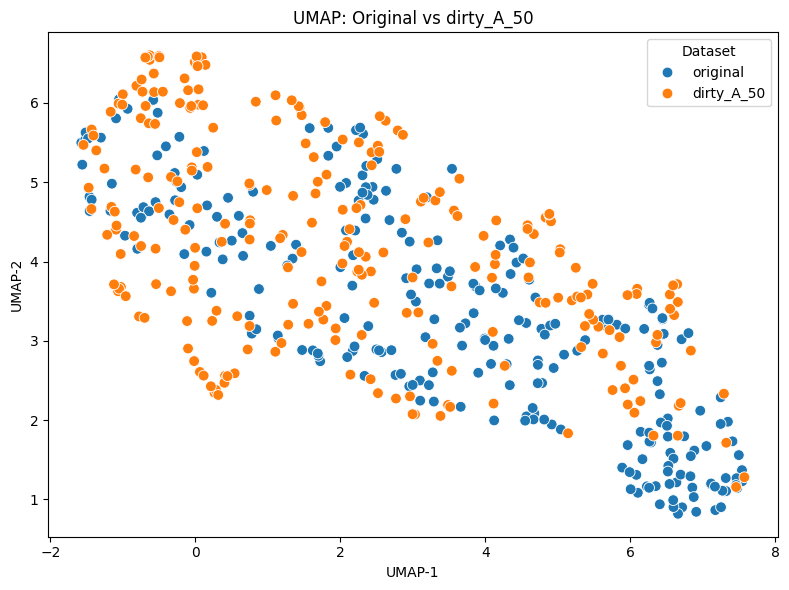

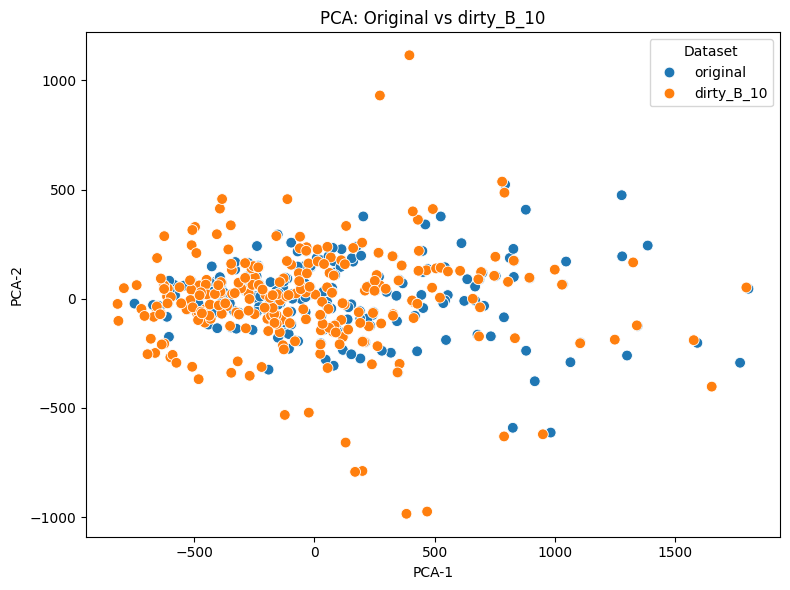

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


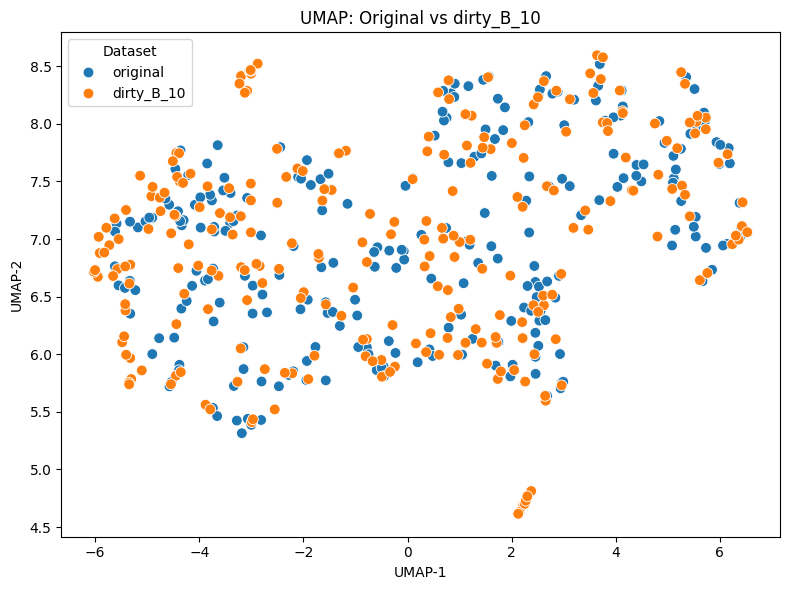

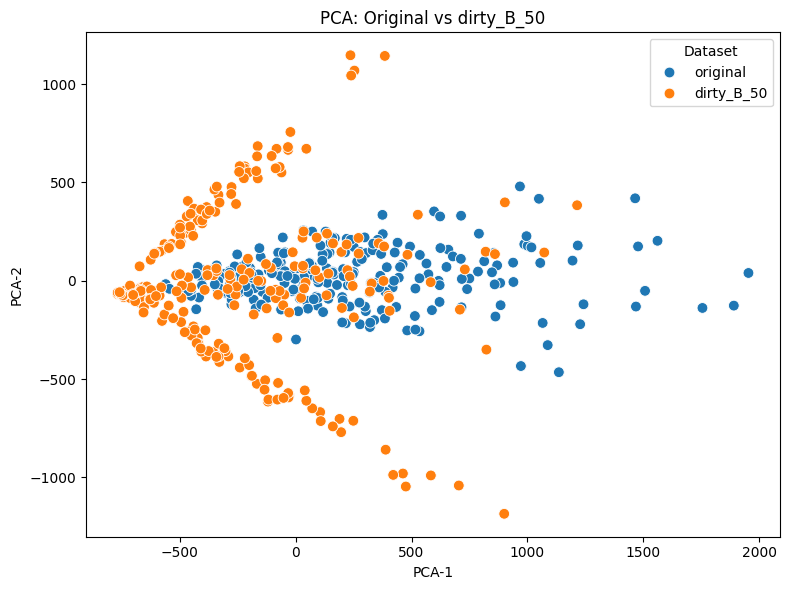

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


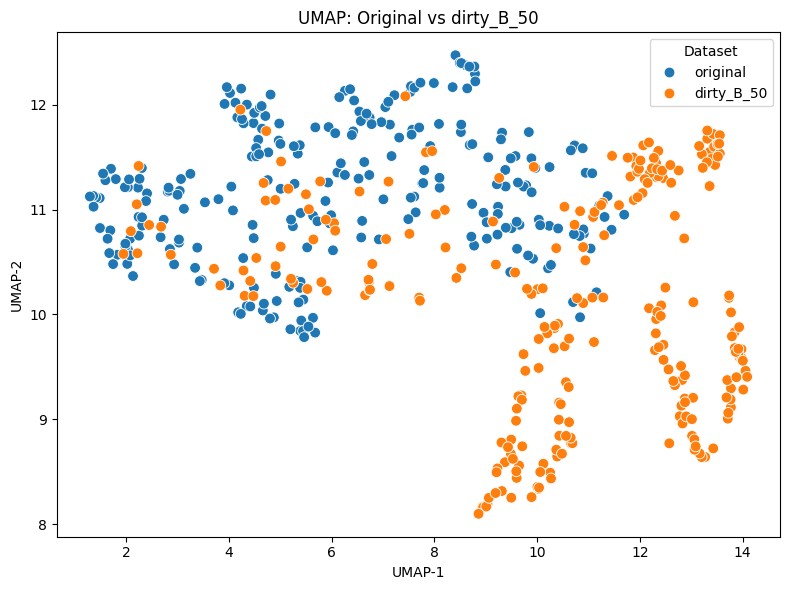

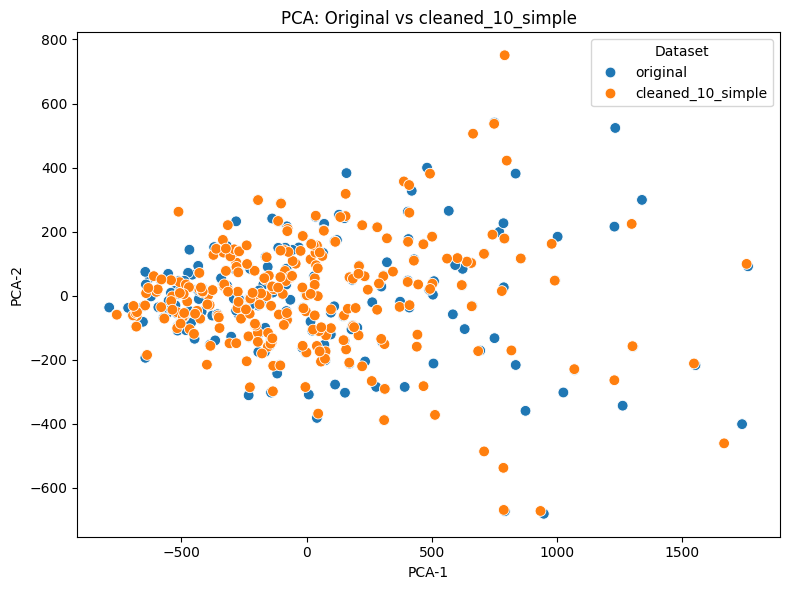

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


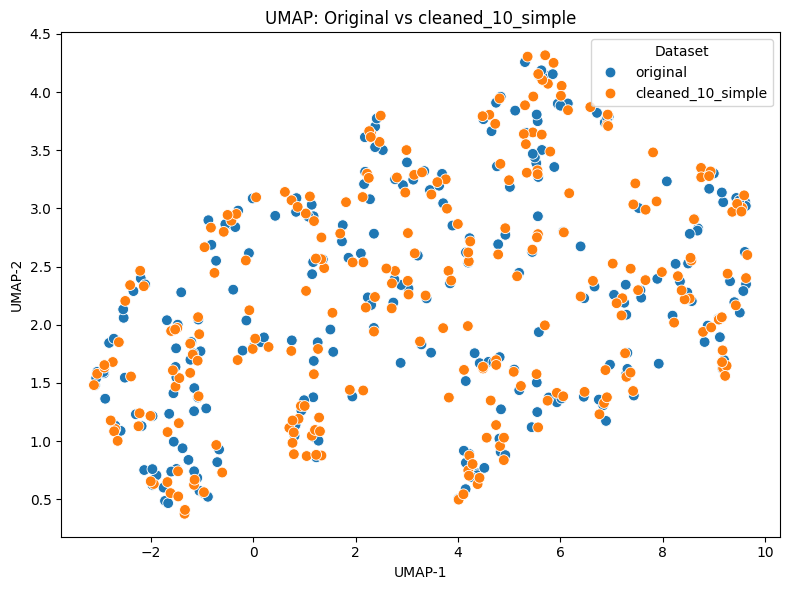

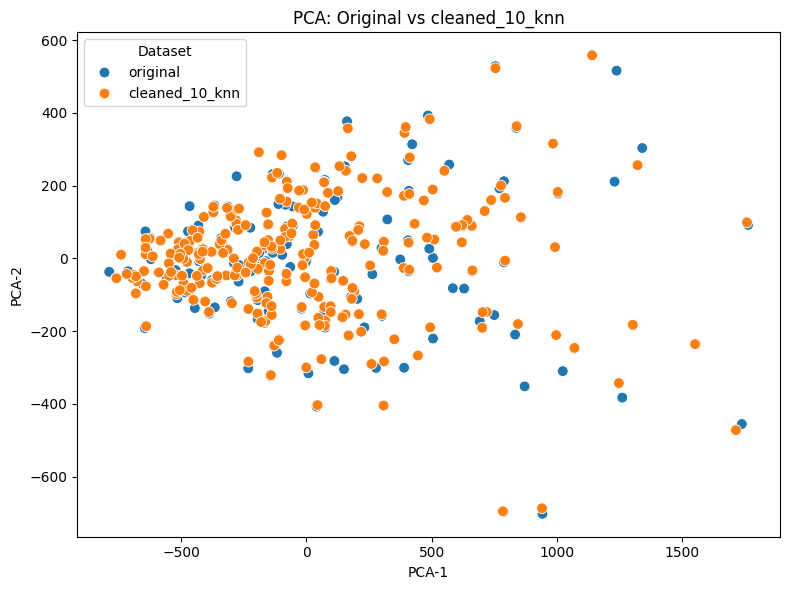

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


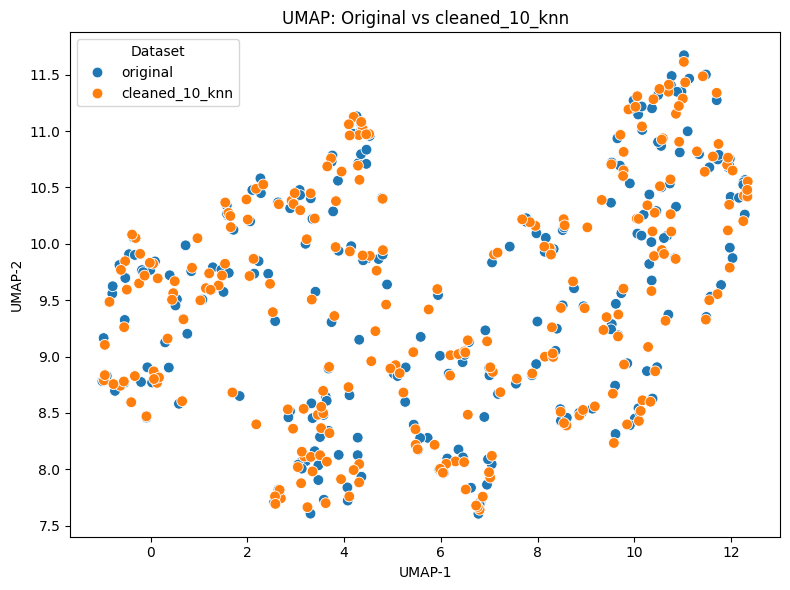

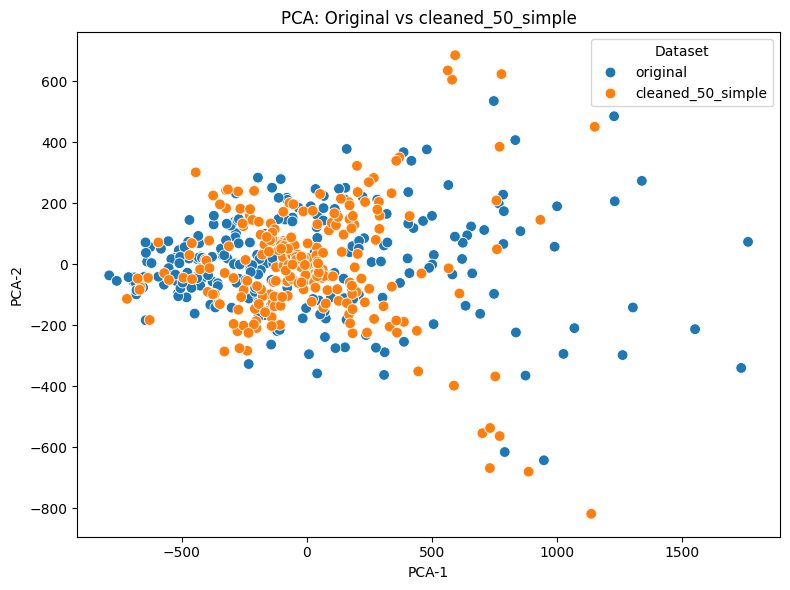

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


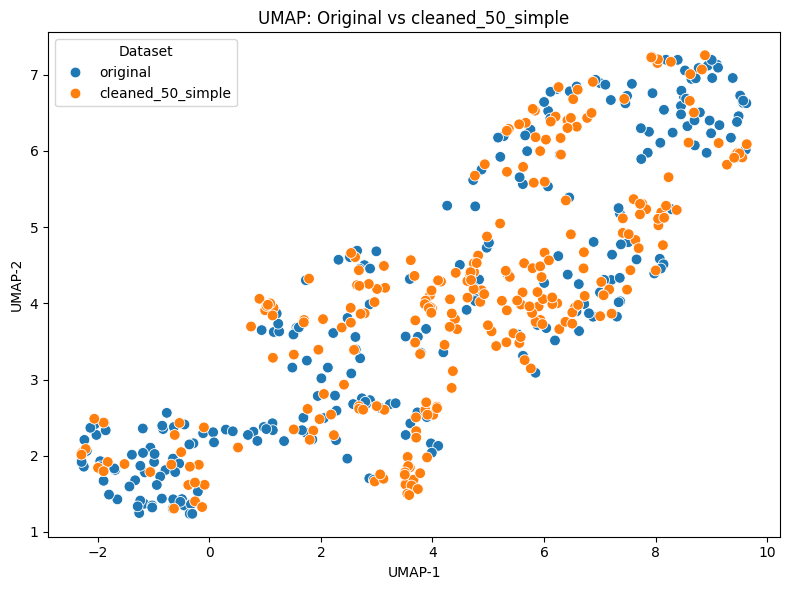

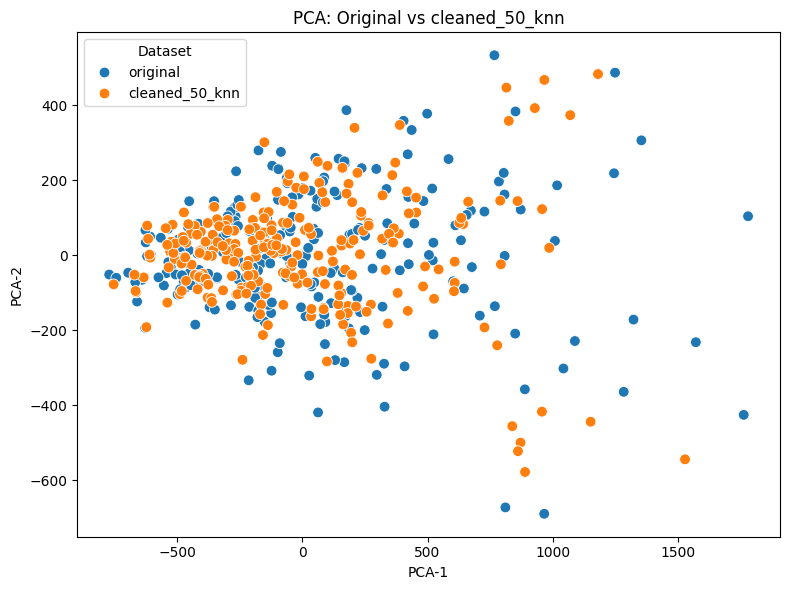

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


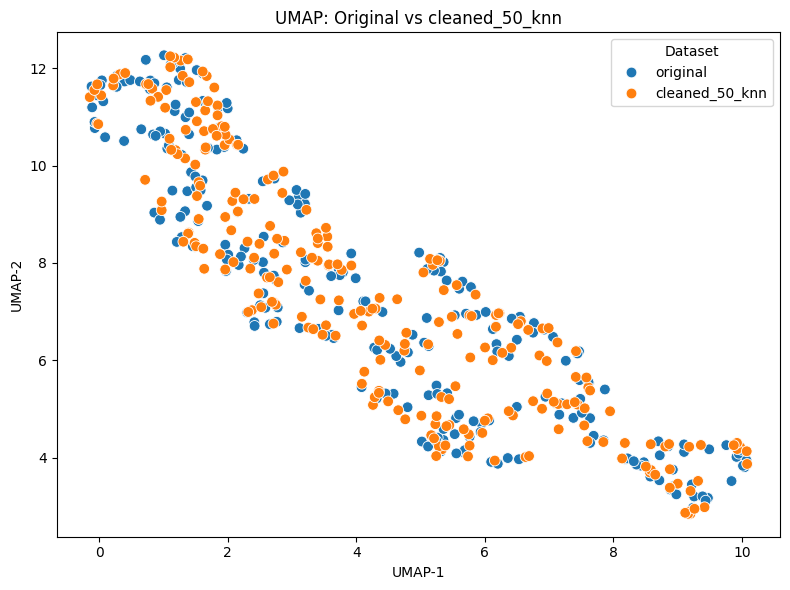

In [ ]:
from sklearn.decomposition import PCA
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# plot PCA or UMAP comparing original to one modified dataset
def plot_comparison(original_df, modified_df, method="pca", name=""):
    df = pd.concat([original_df.assign(__dataset__="original"),
                    modified_df.assign(__dataset__=name)],
                   ignore_index=True)

    X = df.select_dtypes(include="number").fillna(0)
    labels = df["__dataset__"]

    if method == "pca":
        reducer = PCA(n_components=2)
        X_red = reducer.fit_transform(X)
        title = f"PCA: Original vs {name}"
    elif method == "umap":
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
        X_red = reducer.fit_transform(X)
        title = f"UMAP: Original vs {name}"
    else:
        raise ValueError("method must be 'pca' or 'umap'")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_red[:, 0], y=X_red[:, 1], hue=labels, s=60, palette="tab10")
    plt.title(title)
    plt.xlabel(f"{method.upper()}-1")
    plt.ylabel(f"{method.upper()}-2")
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()

# Loop through and compare each dataset (excluding original!!)
for name, df in datasets.items():
    if name == "original":
        continue
    plot_comparison(datasets["original"], df, method="pca", name=name)
    plot_comparison(datasets["original"], df, method="umap", name=name)
